In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
dataset = mnist.load_data('mymnist.db')

In [3]:
len(dataset)

2

In [4]:
train , test = dataset

In [5]:
len(train)

2

In [6]:
X_train , y_train = train

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test , y_test = test

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
img1 = X_train[7]

In [11]:
img1.shape

(28, 28)

In [12]:
import cv2

In [13]:
img1_label = y_train[7]

In [14]:
img1_label

3

In [15]:
img1.shape

(28, 28)

In [16]:
import matplotlib.pyplot as plt

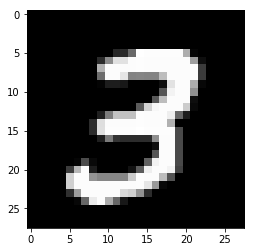

In [17]:
plt.imshow(img1 , cmap='gray')

In [18]:
img1.shape

(28, 28)

In [19]:
img1_1d = img1.reshape(28*28)

In [20]:
img1_1d.shape

(784,)

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train_1d = X_train.reshape(-1 , 28*28)
X_test_1d = X_test.reshape(-1 , 28*28)

In [23]:
X_train_1d.shape

(60000, 784)

In [24]:
X_train = X_train_1d.astype('float32')
X_test = X_test_1d.astype('float32')

In [25]:
X_train.shape

(60000, 784)

In [26]:
y_train.shape

(60000,)

In [27]:
from keras.utils.np_utils import to_categorical

In [28]:
y_train_cat = to_categorical(y_train)

In [29]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [30]:
y_train_cat[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
from keras.models import Sequential

In [32]:
from keras.layers import Dense

In [33]:
model = Sequential()

In [34]:
model.add(Dense(units=512, input_dim=28*28, activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.add(Dense(units=256, activation='relu'))

In [37]:
model.add(Dense(units=128, activation='relu'))

In [38]:
model.add(Dense(units=32, activation='relu'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
Total params: 570,272
Trainable params: 570,272
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.add(Dense(units=10, activation='softmax'))

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 570,602
Trainable params: 570,602
Non-trainable params: 0
_________________________________________________________________


In [42]:
from keras.optimizers import RMSprop

In [43]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', 
             metrics=['accuracy']
             )

In [44]:
h = model.fit(X_train, y_train_cat, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 25s 417us/step - loss: 14.5263 - acc: 0.0988
Epoch 2/20
60000/60000 [==============================] - 21s 345us/step - loss: 14.5267 - acc: 0.0987
Epoch 3/20
60000/60000 [==============================] - 21s 346us/step - loss: 14.5267 - acc: 0.0987
Epoch 4/20
60000/60000 [==============================] - 21s 351us/step - loss: 14.5267 - acc: 0.0987
Epoch 5/20
60000/60000 [==============================] - 22s 360us/step - loss: 14.5267 - acc: 0.0987
Epoch 6/20
60000/60000 [==============================] - 21s 358us/step - loss: 14.5267 - acc: 0.0987
Epoch 7/20
60000/60000 [==============================] - ETA: 0s - loss: 14.5265 - acc: 0.09 - 23s 386us/step - loss: 14.5267 - acc: 0.0987
Epoch 8/20
60000/60000 [==============================] - 22s 372us/step - loss: 14.5267 - acc: 0.0987
Epoch 9/20
60000/60000 [==============================] - 23s 380us/step - loss: 14.5267 -

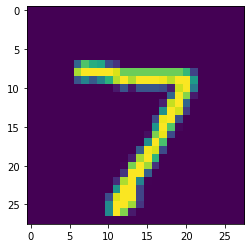

In [64]:
plt.imshow(X_test[0])

In [65]:
y_test[0]

7

In [66]:
model.predict(X_test[0])

ValueError: Error when checking input: expected dense_1_input to have shape (784,) but got array with shape (28,)

In [69]:
test_img = X_test[0].reshape(28*28)

In [71]:
test_img.shape

(784,)

In [72]:
model.predict(test_img)

ValueError: Error when checking input: expected dense_1_input to have shape (784,) but got array with shape (1,)